# **Seoul Bike Project**

**Contributors: Au Yi Teng, Chen Qiao Leng, Wan Li Xin Yuan**

# 1. Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
url = 'https://raw.githubusercontent.com/auyiteng/SeoulBike/main/SeoulBikeData.csv'
df = pd.read_csv(url, sep=',', header=0, encoding='unicode_escape')

In [ ]:
print(df.head())
print(df.info())
df.describe(include='all').transpose()

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

# 2. Cleaning the Data

Converting Data Types

In [ ]:
#converting "Hour" from int type to catogorical
df['Hour'] = df['Hour'].astype('object')

Remove Non-operational Rows

In [ ]:
#Remove rows when there are no bikes rented due to the system being down
df = df[df['Functioning Day'] == 'Yes']

Dropping the Date Column

In [ ]:
df = df.drop(columns=['Date'])

# 3. Exploratory Data Analysis

**Table of Contents**

**1. Number of Bike Counts by Season**

Number of Bike Counts by Season (Preliminary)

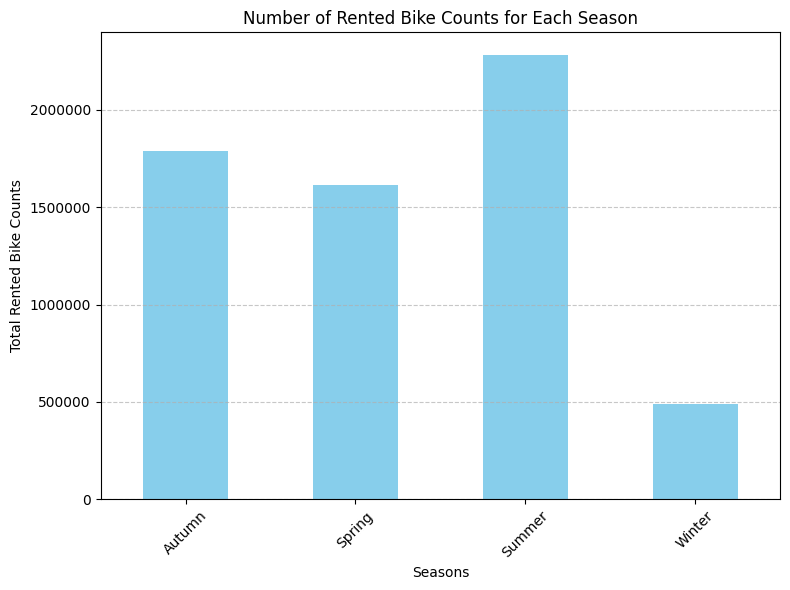

In [ ]:
# Grouping the data by 'Seasons' and calculating the sum of 'Rented Bike Count' for each season
season_counts = df.groupby('Seasons')['Rented Bike Count'].sum()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Rented Bike Counts for Each Season')
plt.xlabel('Seasons')
plt.ylabel('Total Rented Bike Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.tight_layout()
plt.show()

Distribution of Seasons

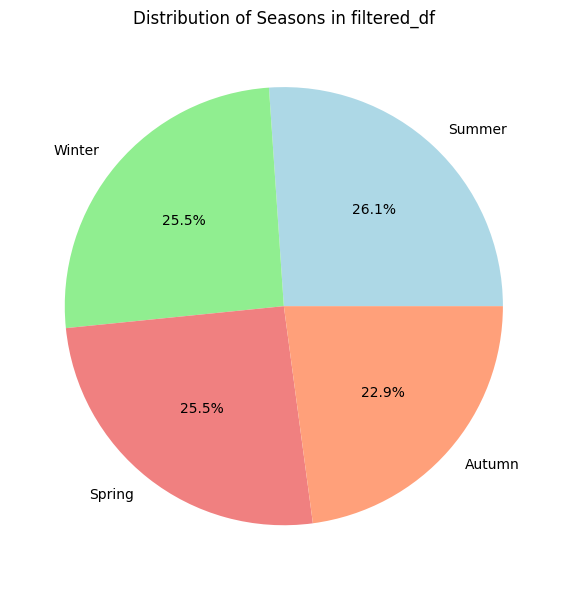

Season Counts:
Summer: 2208
Winter: 2160
Spring: 2160
Autumn: 1937

Mean season count: 2116.25


In [ ]:
# Count the occurrences of each season
season_counts = df['Seasons'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
season_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Distribution of Seasons in filtered_df')
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()

# Calculate the mean of the season counts
mean_season_count = season_counts.mean()

# Print the count of each season
print("Season Counts:")
for season, count in season_counts.items():
    print(f"{season}: {count}")

# Print the mean of the season counts
print(f"\nMean season count: {mean_season_count}")

Number of Bike Counts by Season (After Neutralisation)

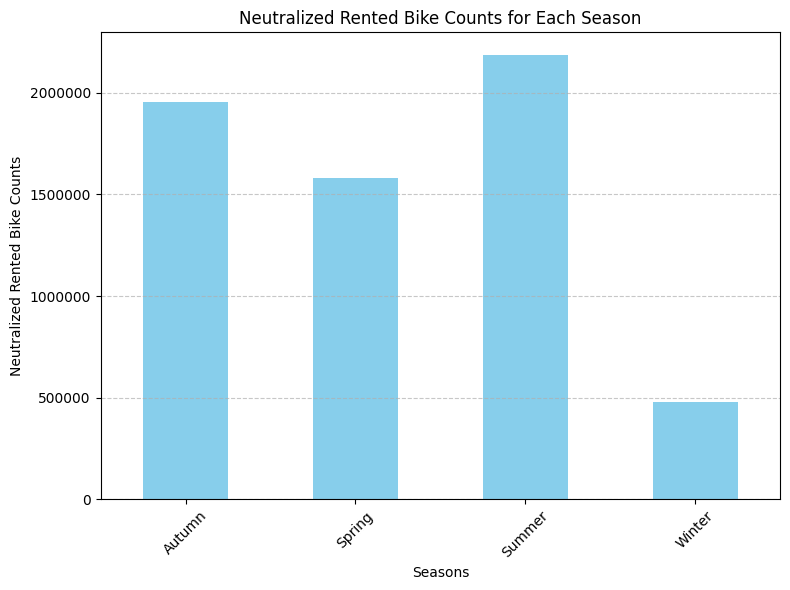

In [ ]:
# Grouping the data by 'Seasons' and calculating the sum of 'Rented Bike Count' for each season
season_counts = df.groupby('Seasons')['Rented Bike Count'].sum()

# Neutralization
neutralized_counts = (season_counts / df['Seasons'].value_counts()) * mean_season_count

# Plotting the bar graph
plt.figure(figsize=(8, 6))
neutralized_counts.plot(kind='bar', color='skyblue')
plt.title('Neutralized Rented Bike Counts for Each Season')
plt.xlabel('Seasons')
plt.ylabel('Neutralized Rented Bike Counts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis
plt.tight_layout()
plt.show()


Average Rental Count by Day Type

Average rental count during non-holidays: 739
Average rental count during holidays: 529


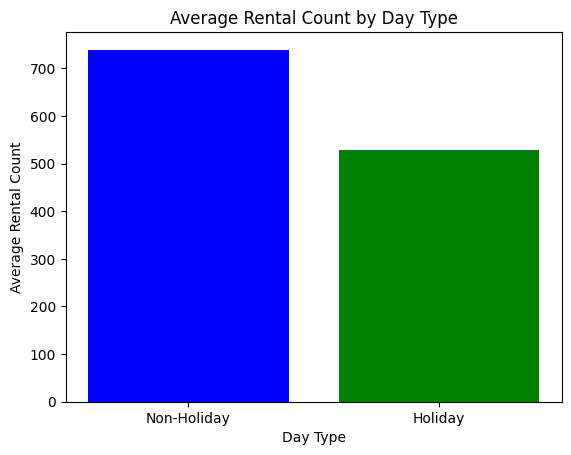

In [ ]:
noholiday_data = df[df['Holiday'] == 'No Holiday']
holiday_data = df[df['Holiday'] == 'Holiday']
average_noholiday_count = noholiday_data['Rented Bike Count'].mean()
average_holiday_count = holiday_data['Rented Bike Count'].mean()
print("Average rental count during non-holidays: {:.0f}".format(average_noholiday_count))
print("Average rental count during holidays: {:.0f}".format(average_holiday_count))

# Plotting the bar graph
categories = ['Non-Holiday', 'Holiday']
average_counts = [average_noholiday_count, average_holiday_count]

# Plotting
plt.bar(categories, average_counts, color=['blue', 'green'])
plt.xlabel('Day Type')
plt.ylabel('Average Rental Count')
plt.title('Average Rental Count by Day Type')
plt.show()

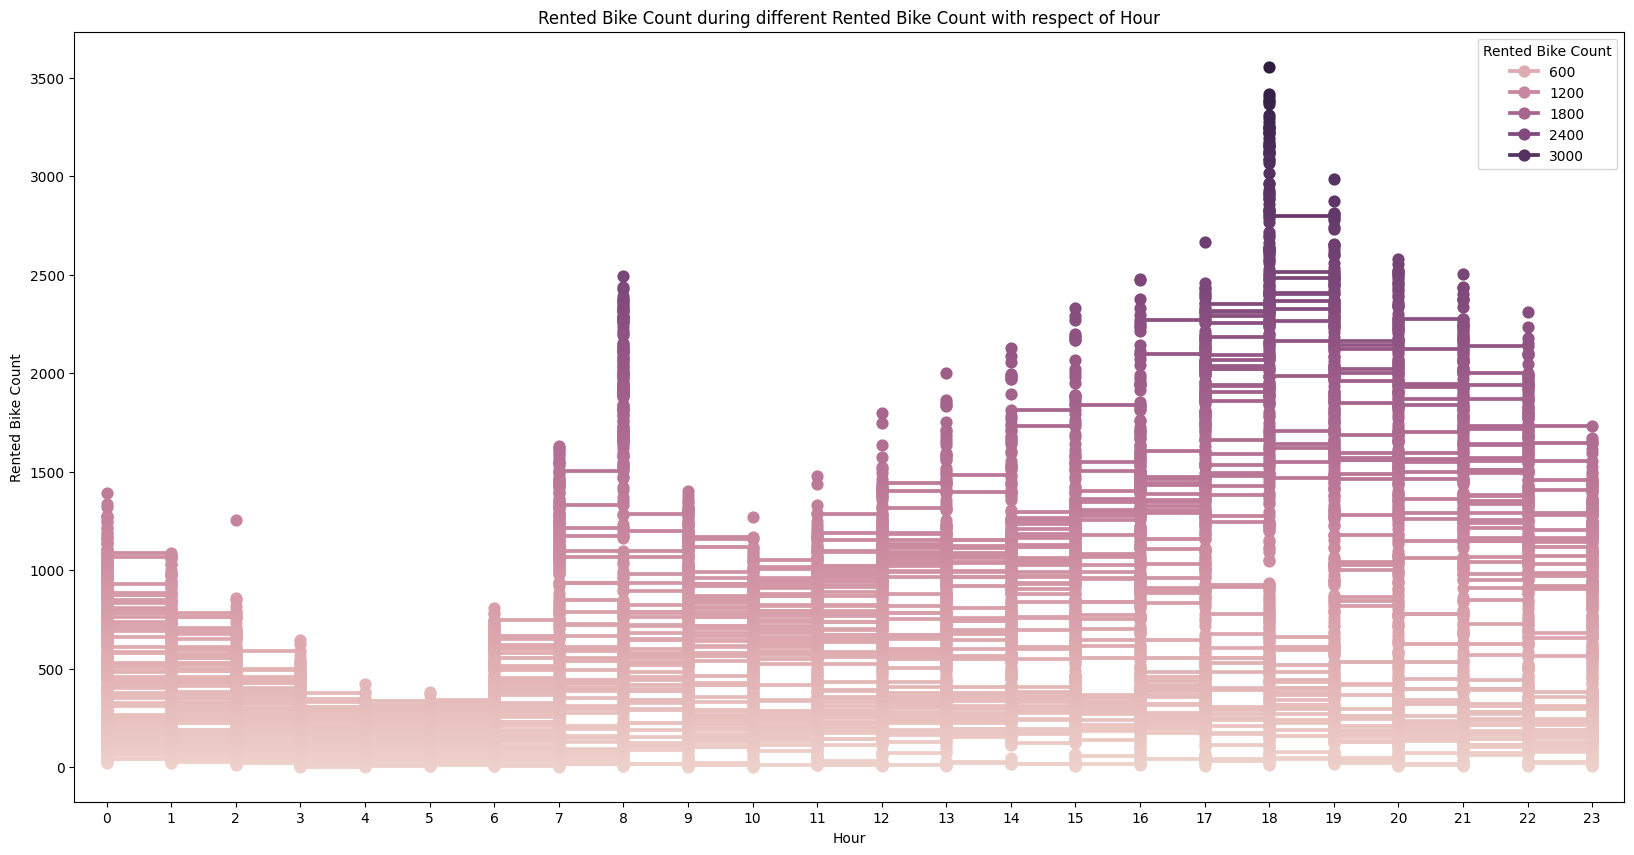

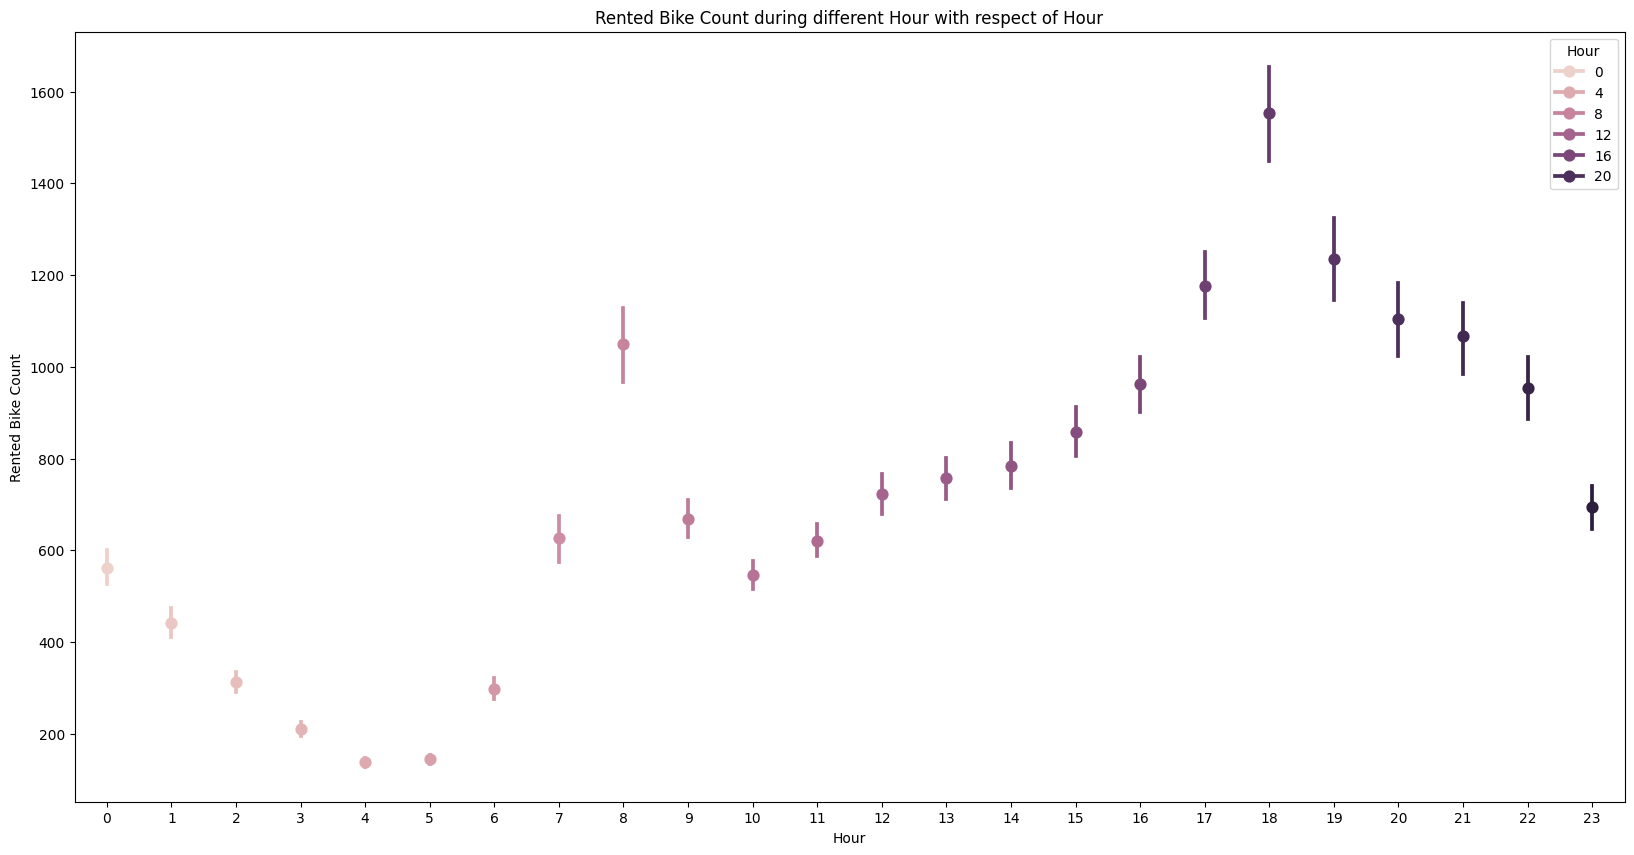

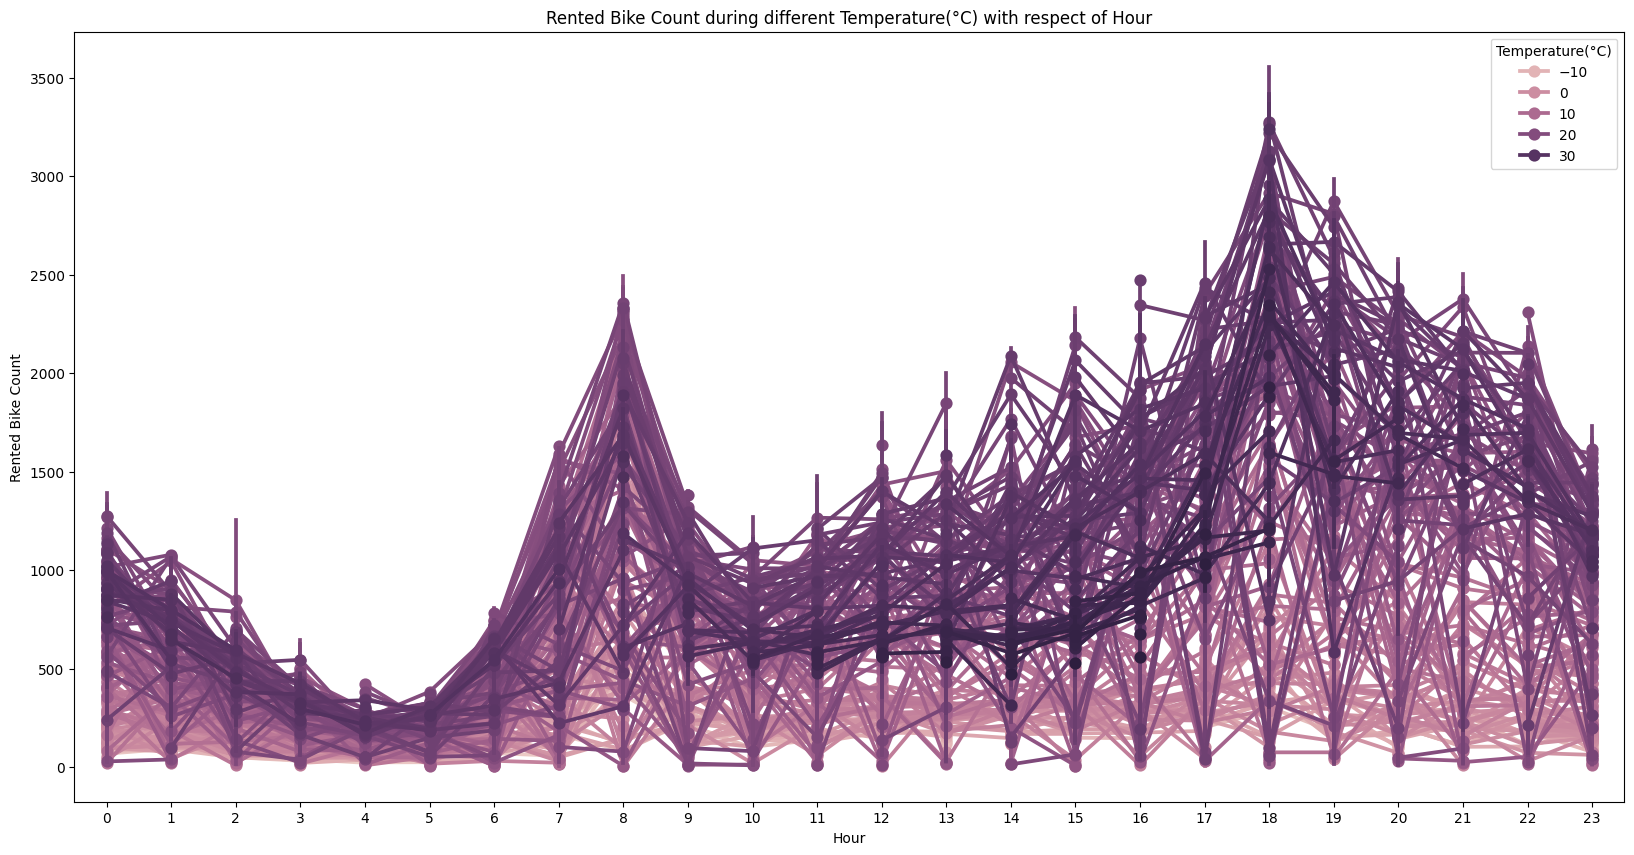

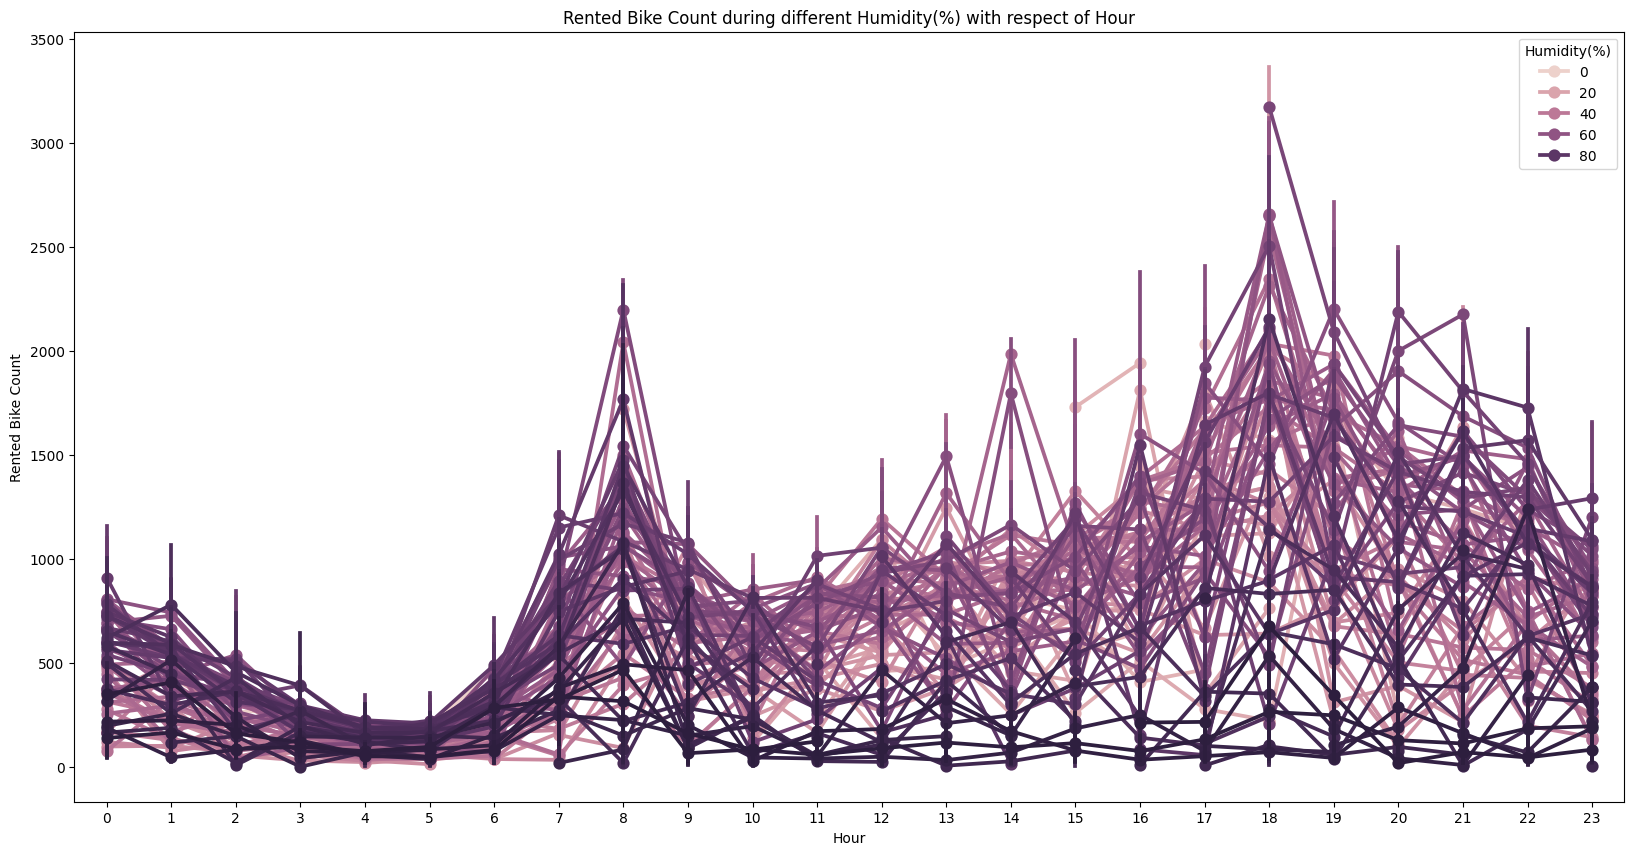

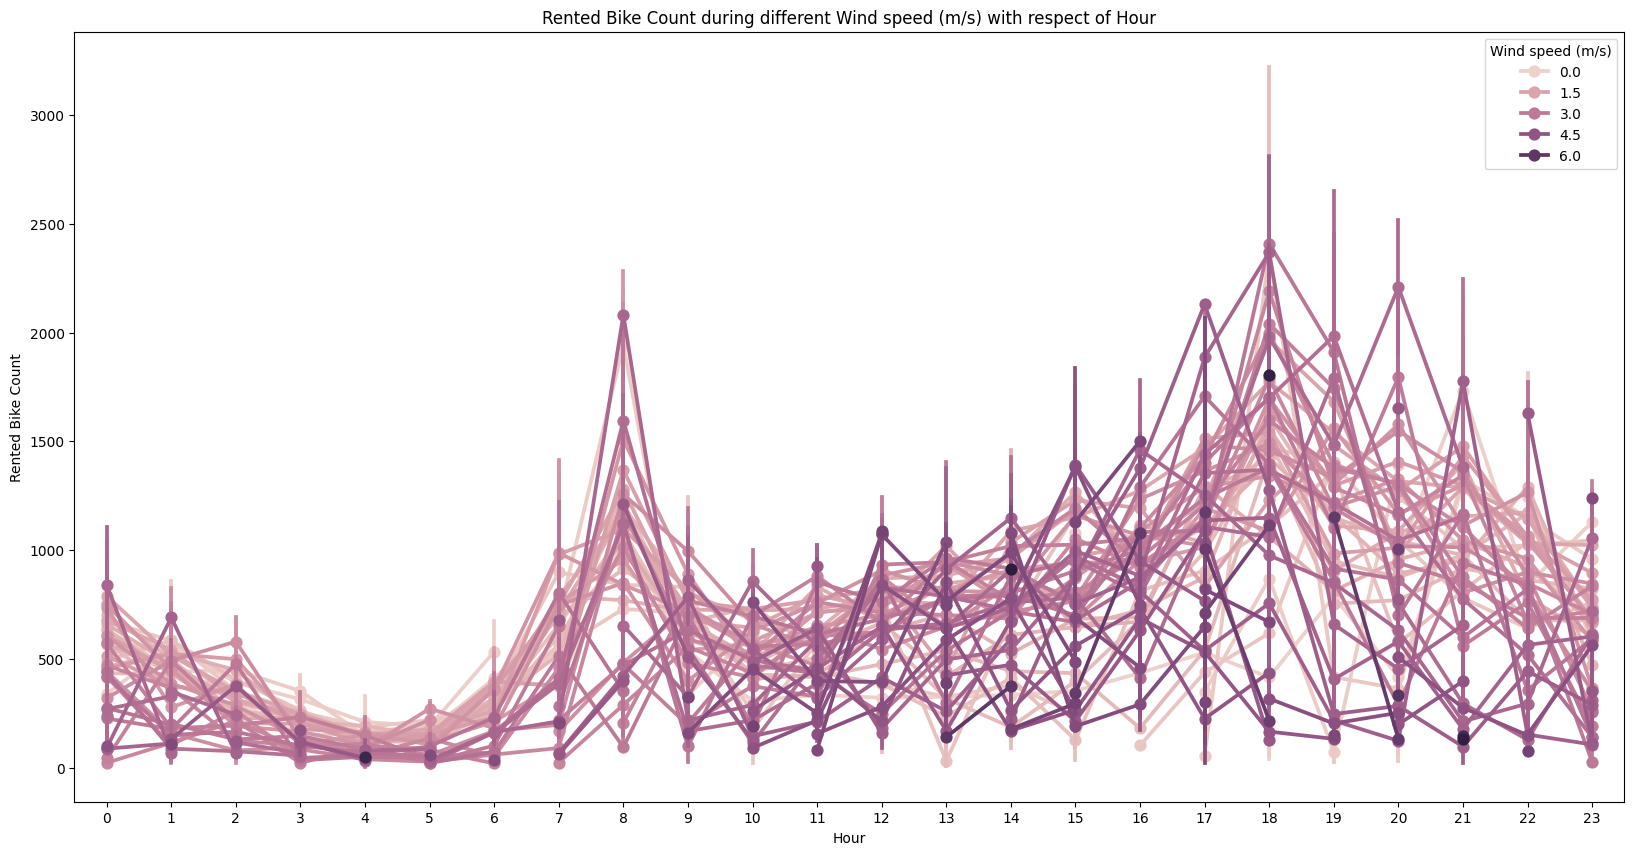

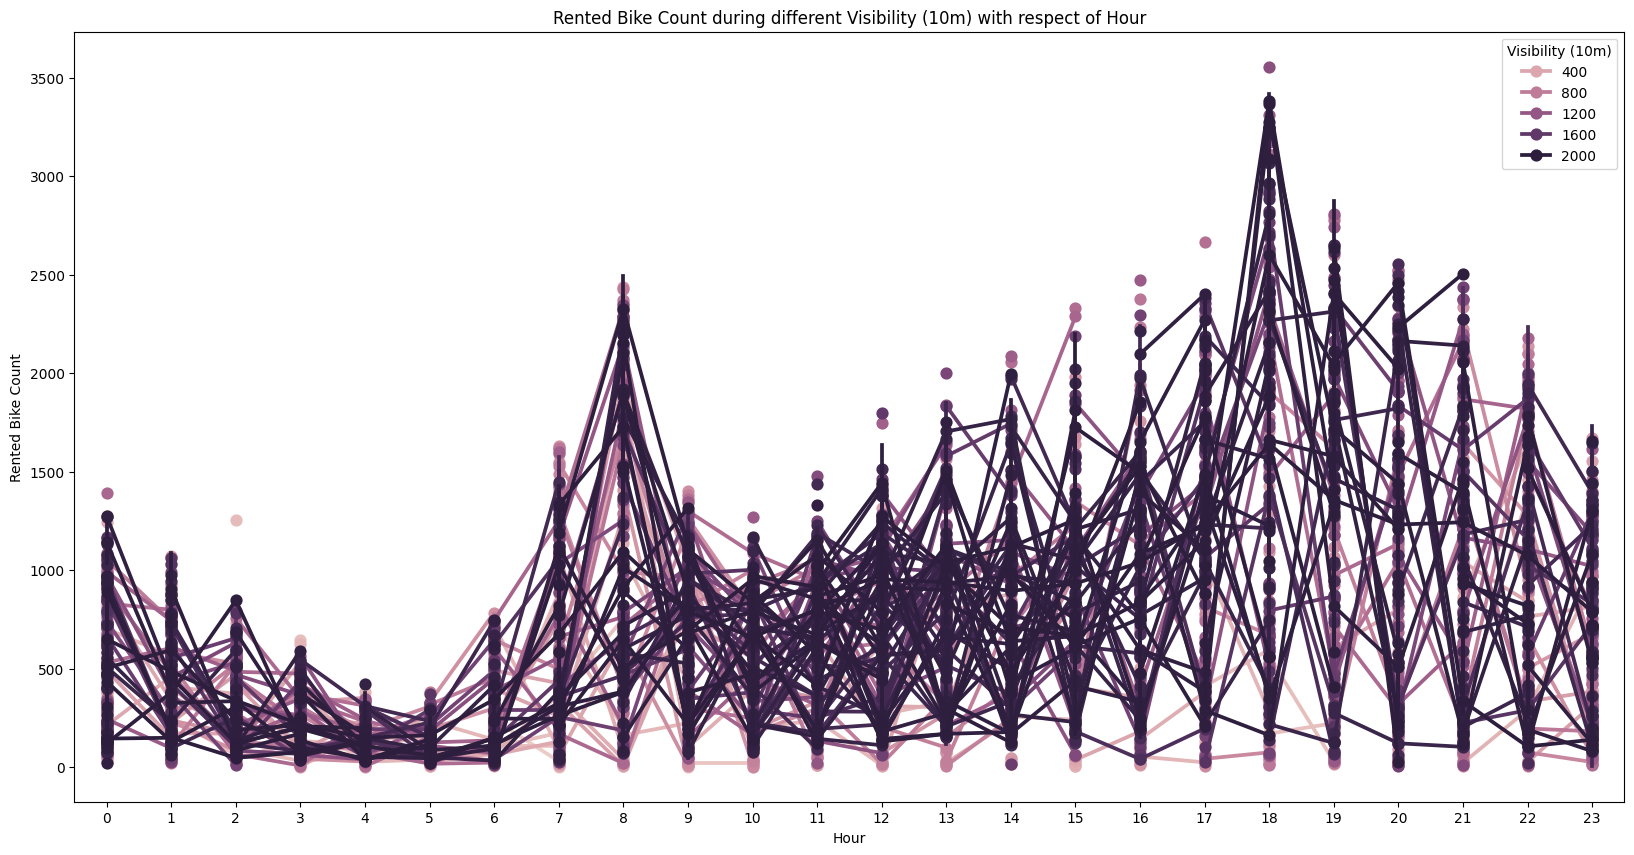

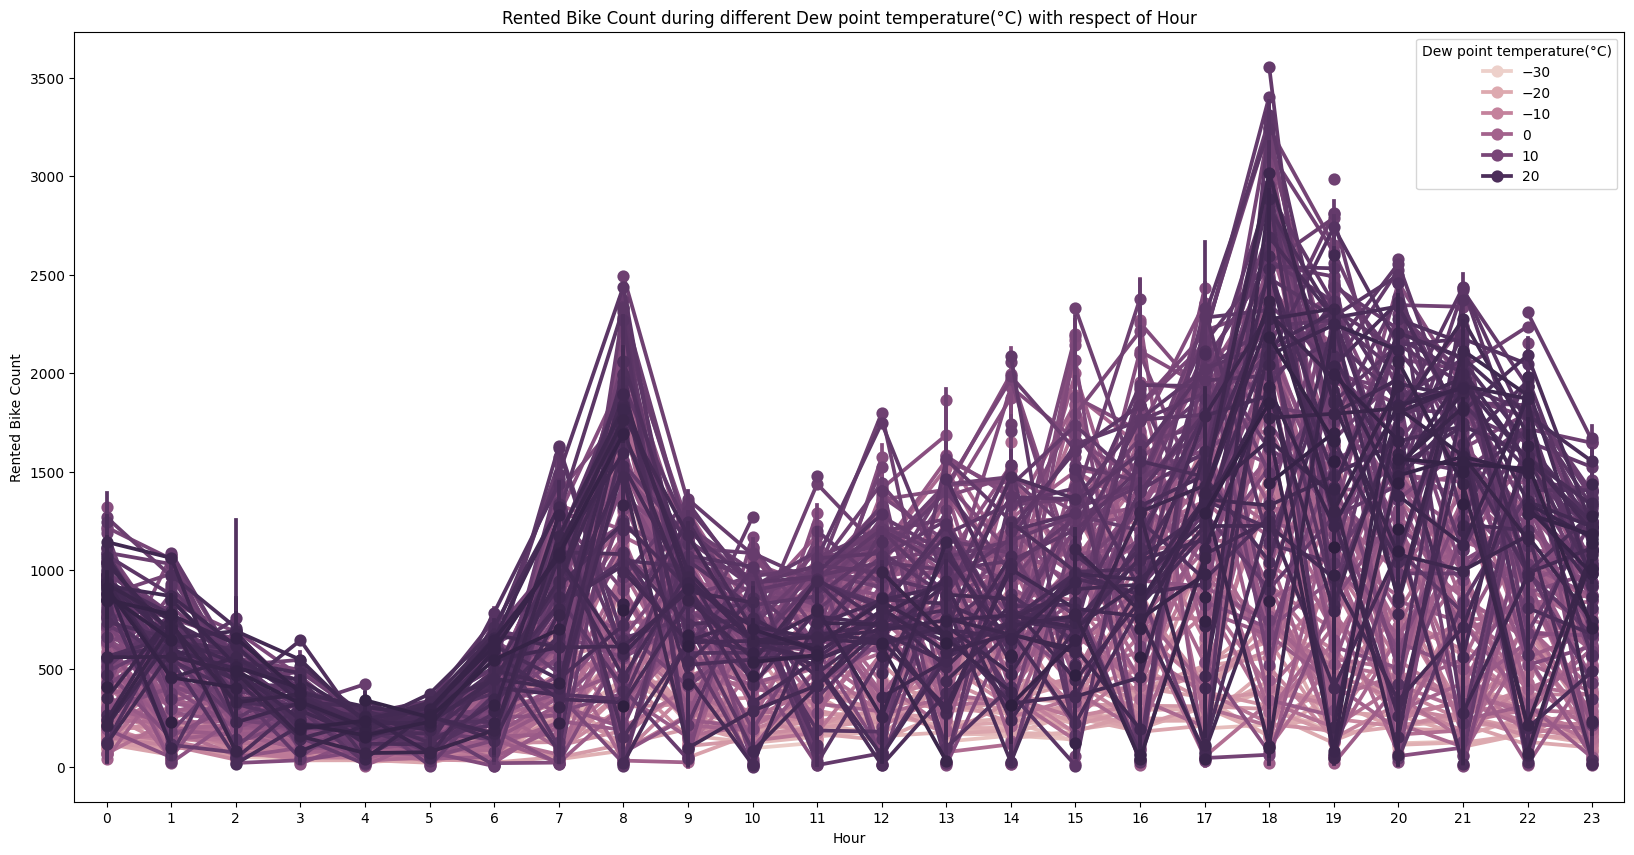

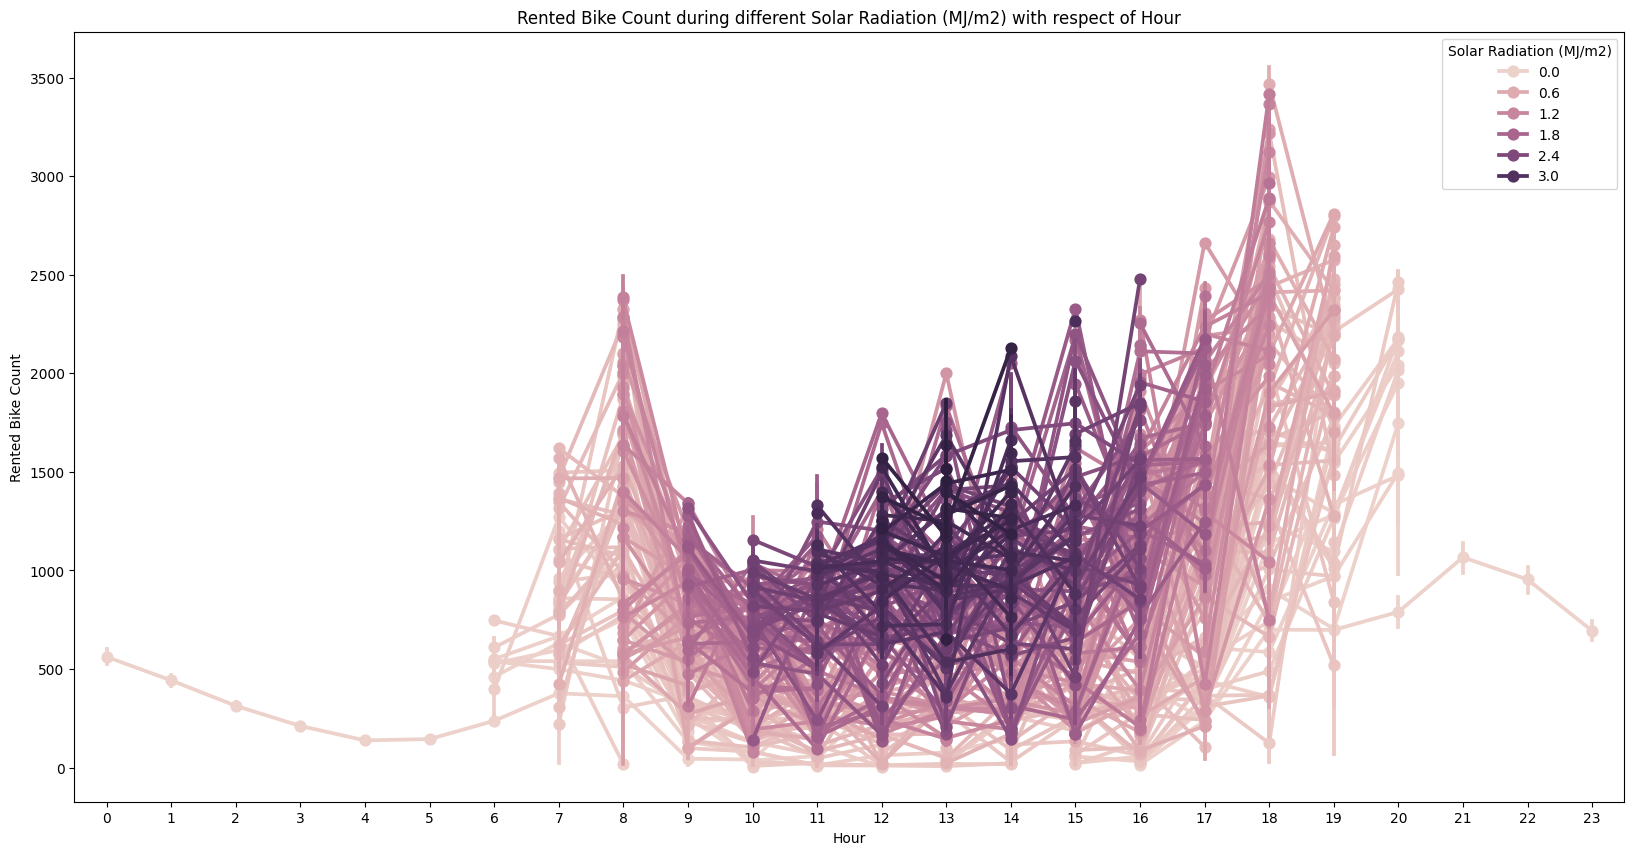

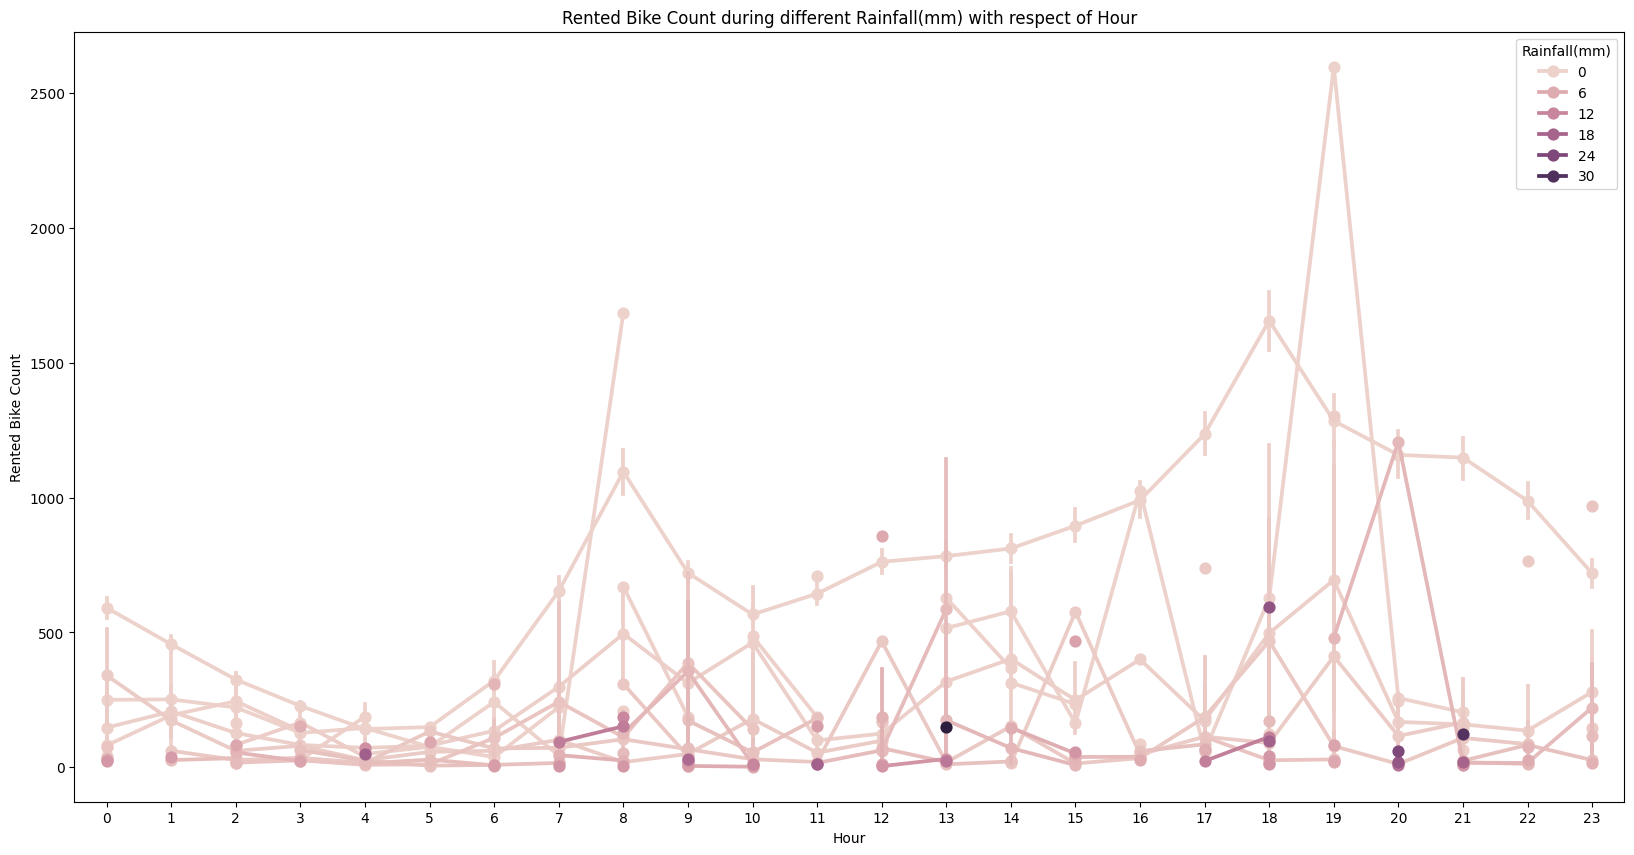

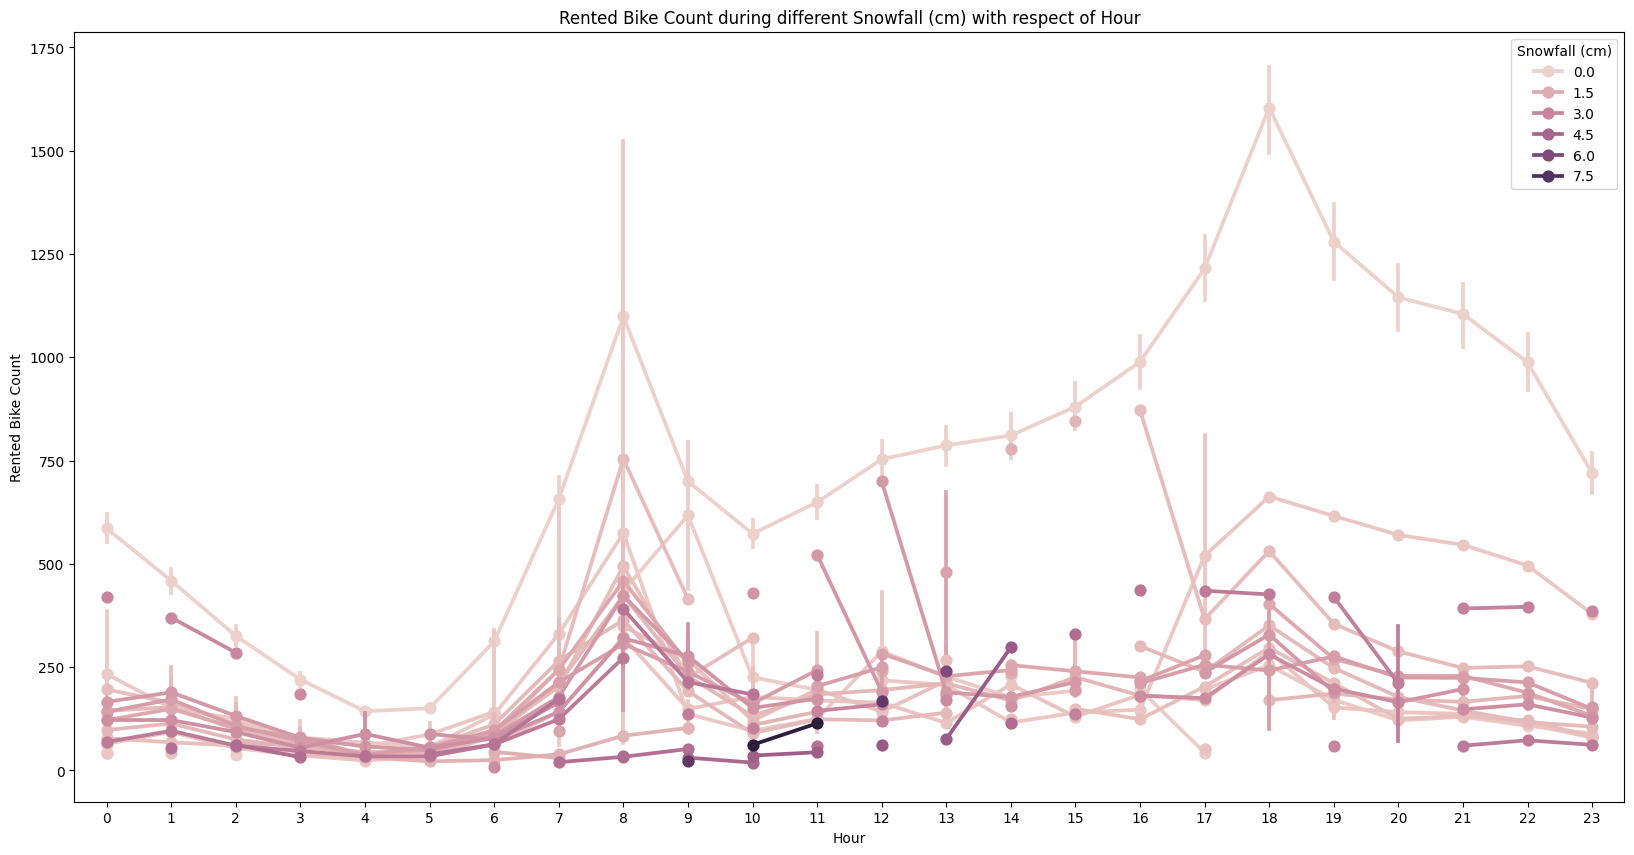

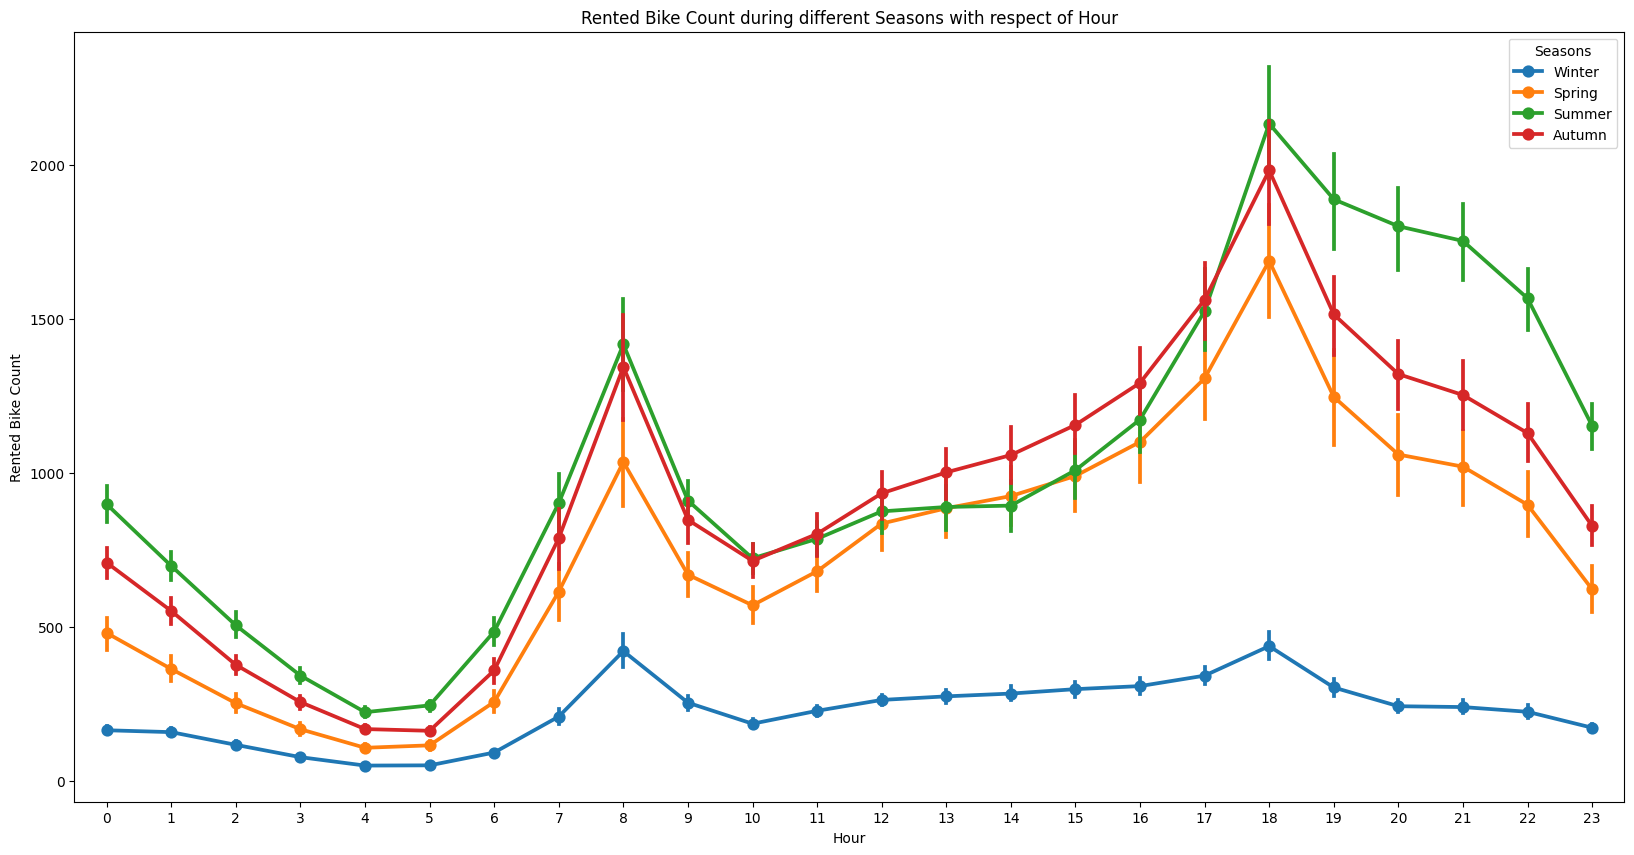

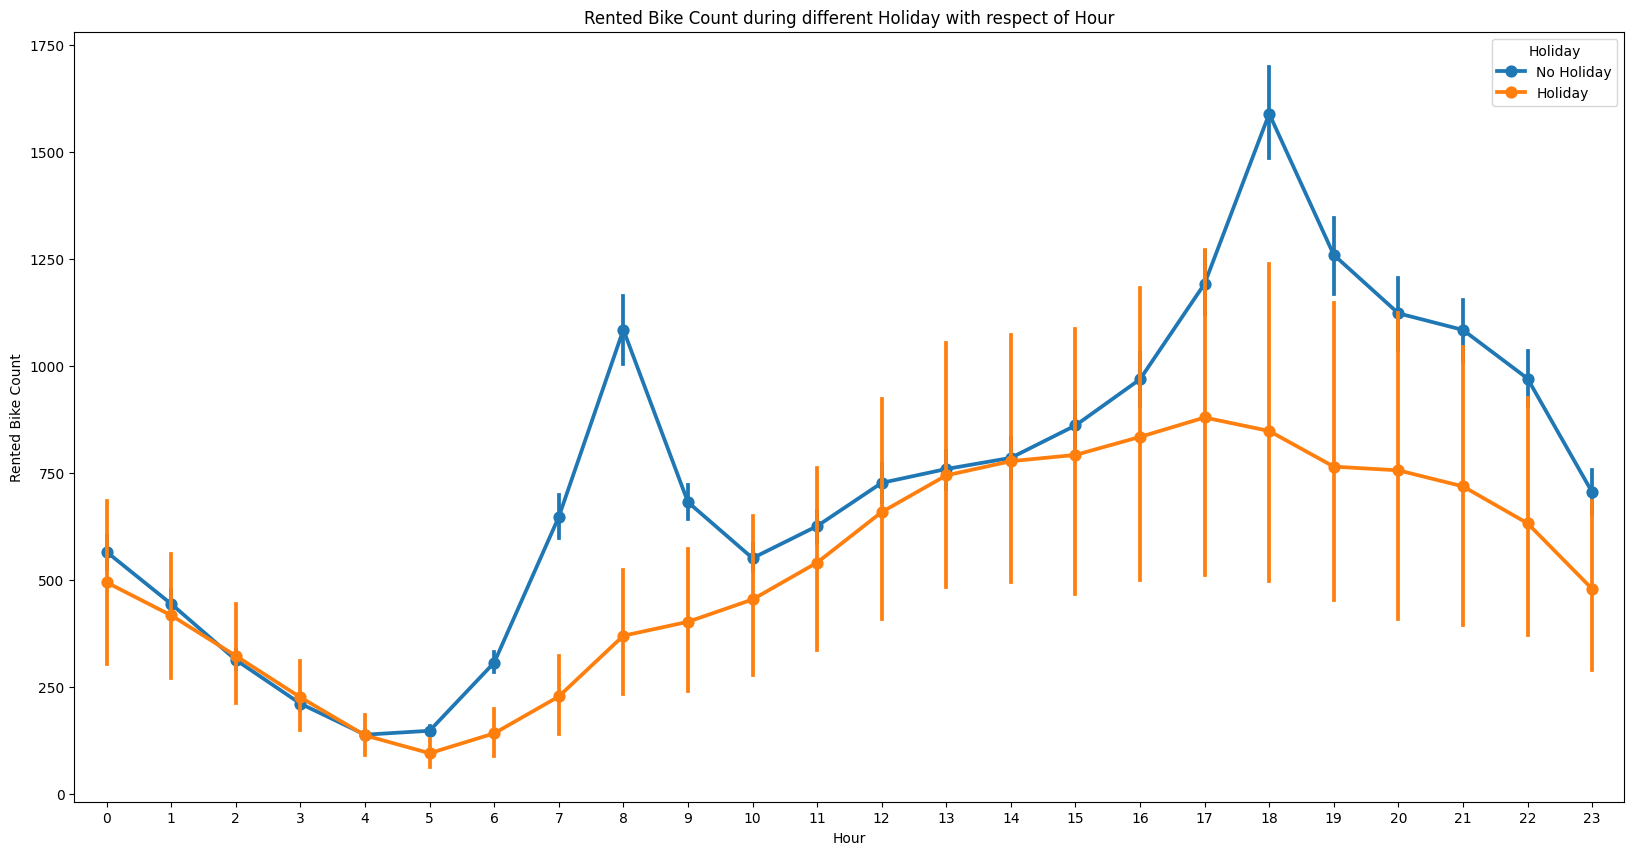

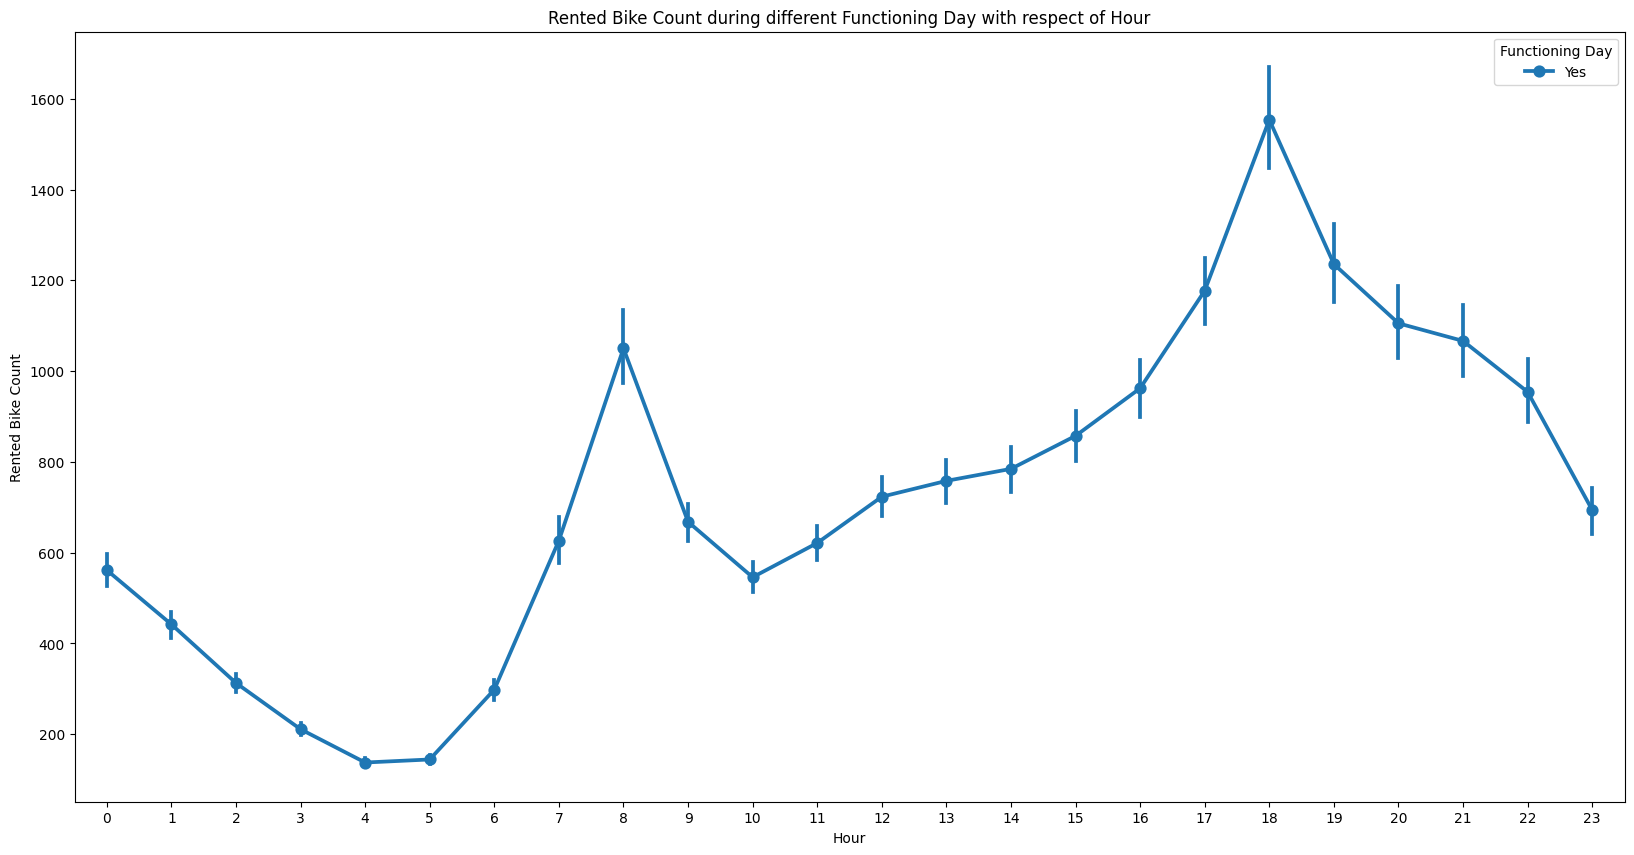

In [ ]:
for i in df.columns:
  plt.figure(figsize=(20,10))
  sb.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
  plt.title(f"Rented Bike Count during different {i} with respect of Hour")
plt.show()

Correlation

<Axes: >

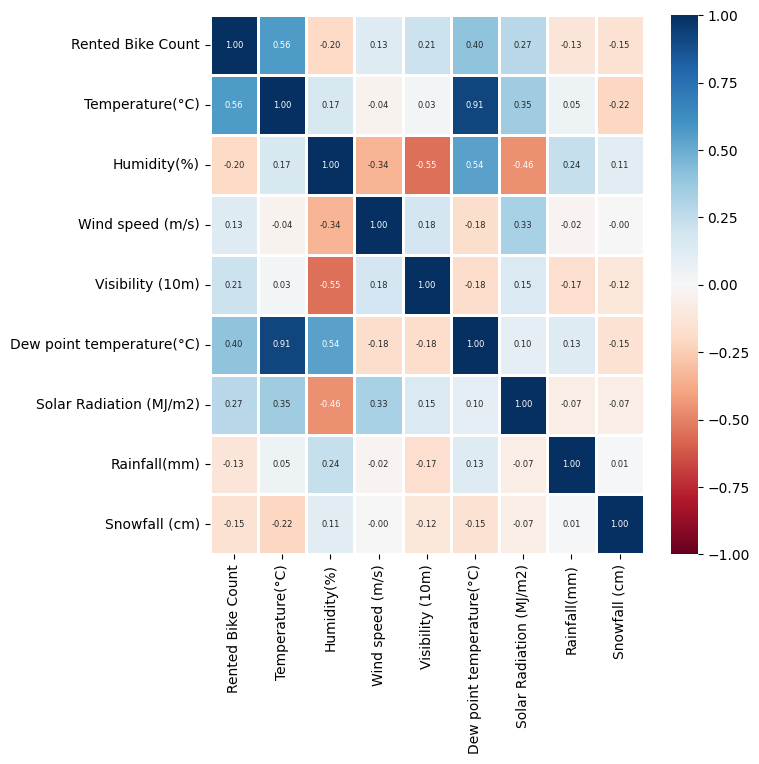

In [ ]:
# using seaborn heatmap for ploting correlation graph
f = plt.figure(figsize=(7, 7))
sb.heatmap(df.corr(numeric_only=True), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 6}, cmap = "RdBu")

# 4. Core Analysis

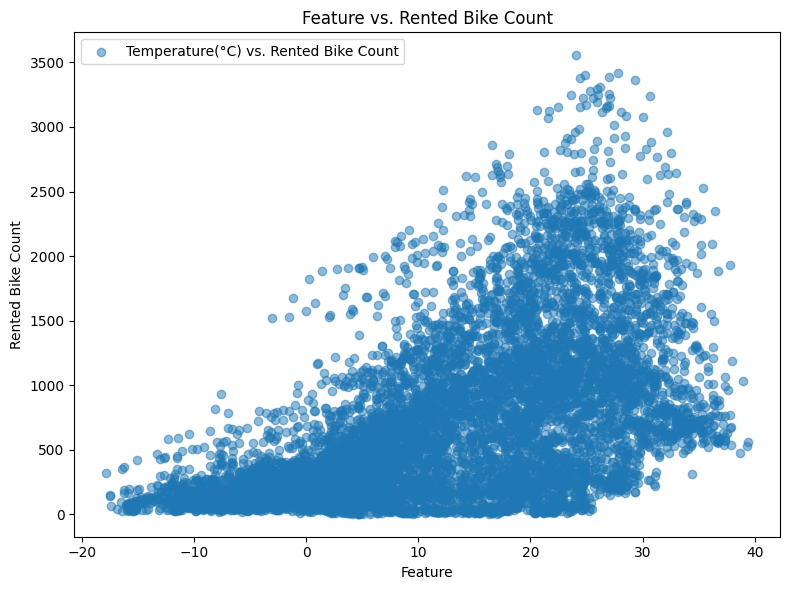

In [ ]:
# Create scatter plots for each feature against the target variable
fig, ax = plt.subplots(figsize=(8, 6))

for feature in features:
    ax.scatter(df[feature], df['Rented Bike Count'], alpha=0.5, label=f'{feature} vs. Rented Bike Count')

ax.set_title('Feature vs. Rented Bike Count')
ax.set_xlabel('Feature')
ax.set_ylabel('Rented Bike Count')
ax.legend()

plt.tight_layout()
plt.show()


Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Temperature(°C)'] # 'Solar Radiation (MJ/m2)'

#Split features and target variable
X = df[features]
y = df['Rented Bike Count']

#Split data into 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

#Test model prediction
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Print coefficients & intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 265041.95053837827
Coefficients: [30.0770985]
Intercept: 346.61897785338726


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


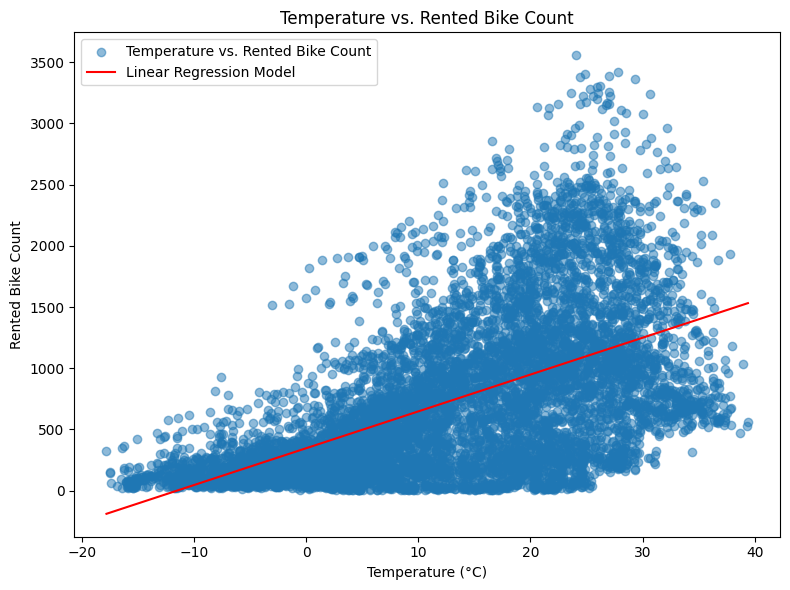

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Temperature(°C)'], df['Rented Bike Count'], alpha=0.5, label='Temperature vs. Rented Bike Count')

# Linear regression line
x_values = np.linspace(df['Temperature(°C)'].min(), df['Temperature(°C)'].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
ax.plot(x_values, y_values, color='red', label='Linear Regression Model')

ax.set_title('Temperature vs. Rented Bike Count')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Rented Bike Count')
ax.legend()

plt.tight_layout()
plt.show()

Decision Tree

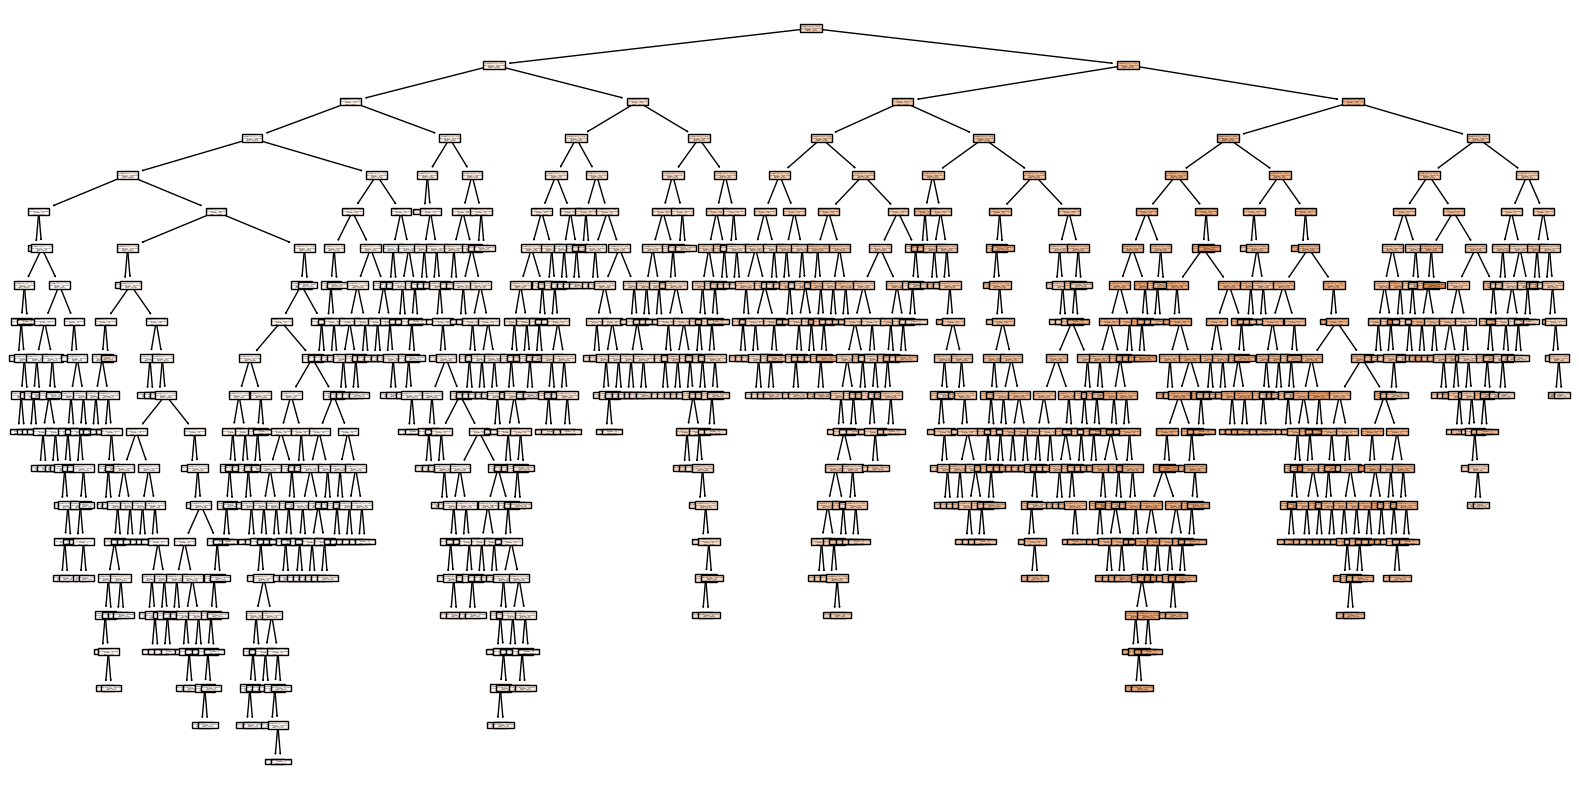

Mean Squared Error: 273493.42840761354


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming 'filtered_df' and 'features' are pre-defined and contain the necessary data

# Split features and target variable
X = df[features]
y = df['Rented Bike Count']

# Split data into 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=features, filled=True)
plt.show()

y_tree_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_tree_pred)
print("Mean Squared Error:", mse)



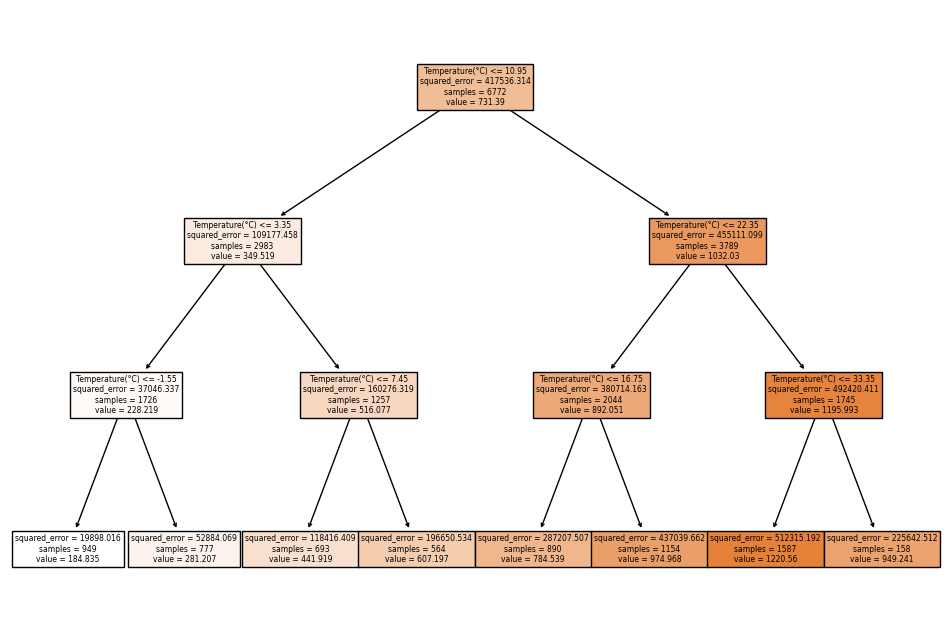

Mean Squared Error: 273493.42840761354


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming 'filtered_df' and 'features' are pre-defined and contain the necessary data

# Split features and target variable
X = df[features]
y = df['Rented Bike Count']

# Split data into 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the Decision Tree model with a maximum depth to limit the size of the tree
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

# Plot the Decision Tree with limited depth
plt.figure(figsize=(12,8))
plot_tree(tree_model, feature_names=features, filled=True)
plt.show()

from sklearn.metrics import mean_squared_error

# Assuming 'y_test' contains the actual values and 'y_tree_pred' contains the predicted values from your Decision Tree model
mse = mean_squared_error(y_test, y_tree_pred)
print("Mean Squared Error:", mse)


Random Forest


Random Forest Mean Squared Error: 258713.2504118298


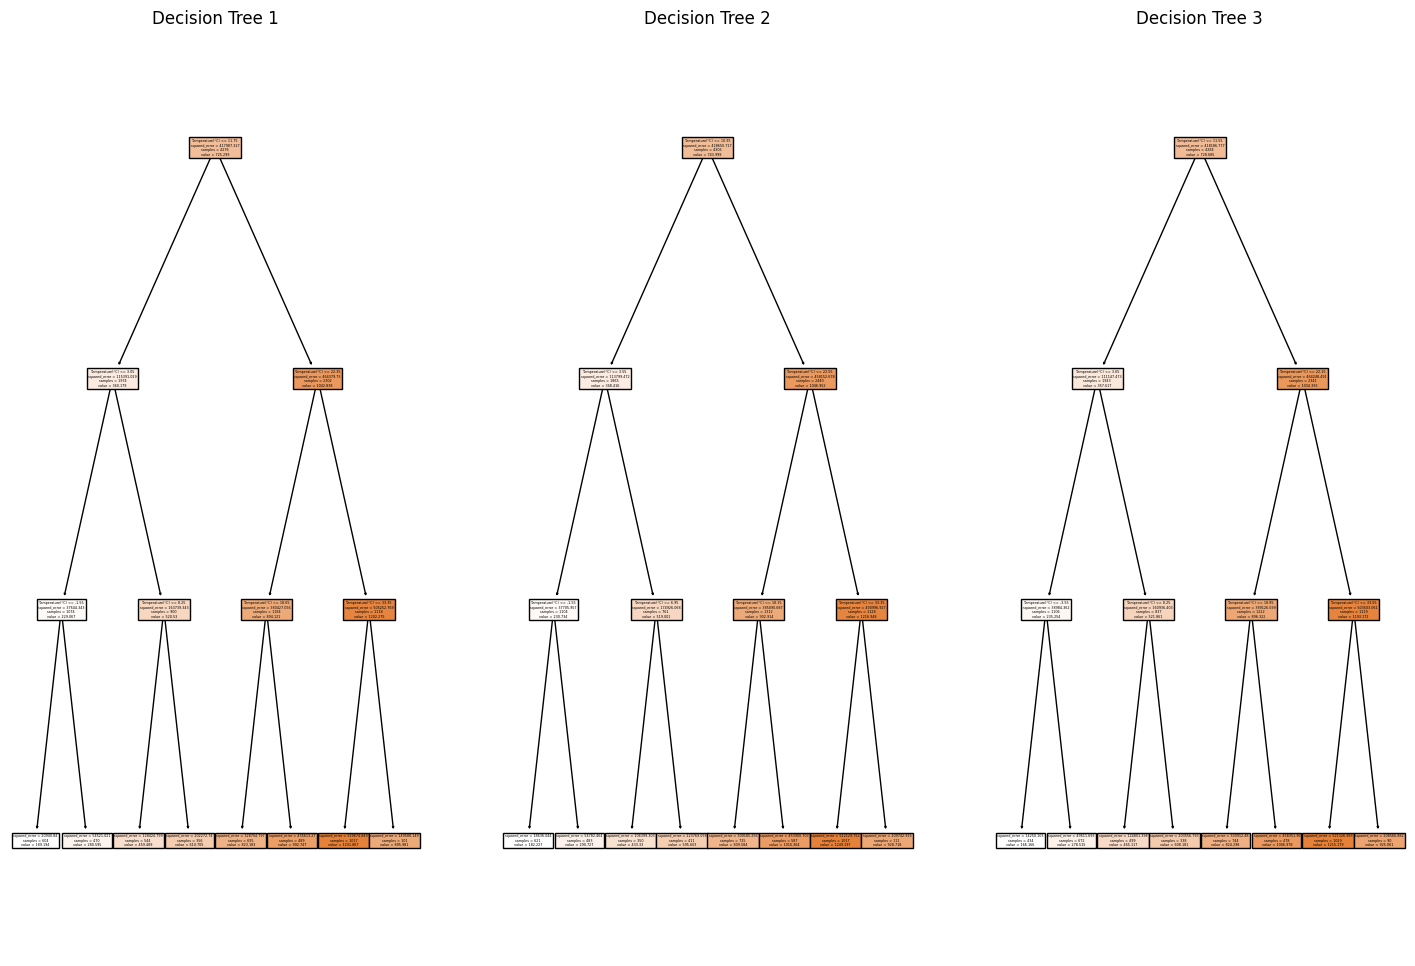

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)

# Train the Random Forest model
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_forest_pred = forest_model.predict(X_test)

# Calculate Mean Squared Error
mse_forest = mean_squared_error(y_test, y_forest_pred)
print("Random Forest Mean Squared Error:", mse_forest)


plt.figure(figsize=(18, 12))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plot_tree(forest_model.estimators_[i], feature_names=features, filled=True)
    plt.title(f'Decision Tree {i+1}')
plt.show()